Pertama-tama, karena menggunakan dataset kaggle, maka harus mengupload kaggle.json berisi username akun kaggle.
Untuk keamanan data tersebut, dapat menggunakan chmod 600

---



In [1]:
from google.colab import files
!pip install -q kaggle
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Masuk kedalam direktori yang kita kehendaki untuk mendownload dataset tersebut

---



In [2]:
cd /content/drive/MyDrive/predictive_analysis

/content/drive/MyDrive/predictive_analysis


Mendownload dataset yang diinginkan

---



In [3]:
!kaggle datasets download -d iamsouravbanerjee/house-rent-prediction-dataset --unzip

  0% 0.00/82.4k [00:00<?, ?B/s]
100% 82.4k/82.4k [00:00<00:00, 3.60MB/s]


Meload dataset yang telah di unzip menggunakan pandas

---



In [4]:
import pandas as pd
data_frame = pd.read_csv('/content/drive/MyDrive/predictive_analysis/House_Rent_Dataset.csv')

In [5]:
data_frame.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Melakukan drop column Posted On karena tidak dibutuhkan

---



In [6]:
data_frame.drop(
    labels = "Posted On",
    axis=1,
    inplace=True
)

Mengecek apakah ada missing value di dalam data. Nilai True menunjukkan adanya missing value sebaliknya False menunjukkan tidak adanya missing value

---



In [7]:
data_frame.isnull().any()

BHK                  False
Rent                 False
Size                 False
Floor                False
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom             False
Point of Contact     False
dtype: bool

Shape menunjukkan banyak (rows, column) dalam data yang ada

---



In [8]:
data_frame.shape

(4746, 11)

Menunjukkan keadaan data secara deskriptif

---



In [9]:
data_frame.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Mengidentifikasi adanya outliers menggunakan boxplot

---



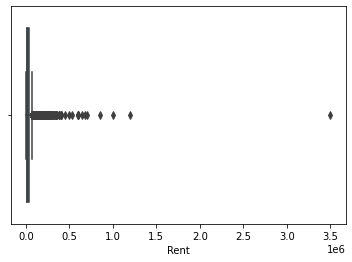

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data_frame['Rent'])

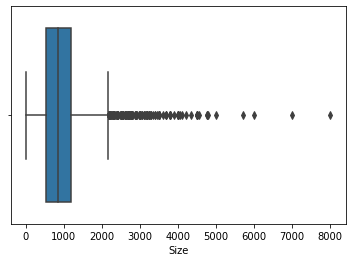

In [11]:
sns.boxplot(x=data_frame['Size'])

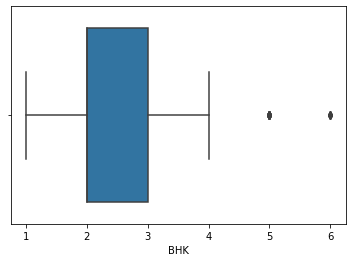

In [12]:
sns.boxplot(x=data_frame['BHK'])

Menangani outliers menggunakan metode IQR

---



In [13]:
Q1 = data_frame.quantile(0.25)
Q3 = data_frame.quantile(0.75)
IQR=Q3-Q1
data_frame=data_frame[~((data_frame<(Q1-1.5*IQR))|(data_frame>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data_frame.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(4131, 11)

Univariate analysis <br>
Melakukan pembagian numerical dan categorical features pada data 

In [14]:
numerical_features = ['BHK', 'Rent', 'Size', 'Bathroom']
categorical_features = ['Furnishing Status', 'Tenant Preferred','Point of Contact', 'Area Type']

                jumlah sampel  persentase
Semi-Furnished           1931        46.7
Unfurnished              1698        41.1
Furnished                 502        12.2


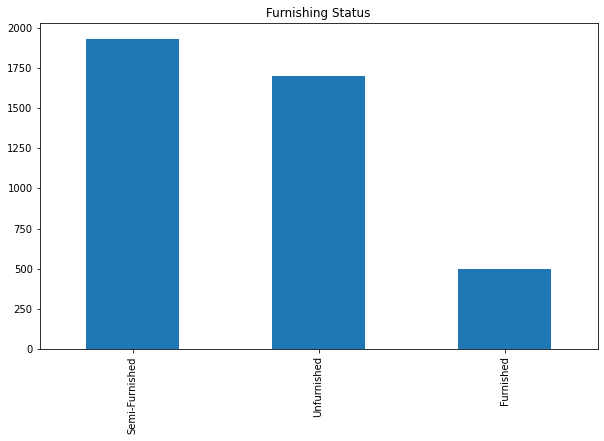

In [15]:
feature = categorical_features[0]
count = data_frame[feature].value_counts()
percent = 100*data_frame[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(10,6));

                  jumlah sampel  persentase
Bachelors/Family           3055        74.0
Bachelors                   707        17.1
Family                      369         8.9


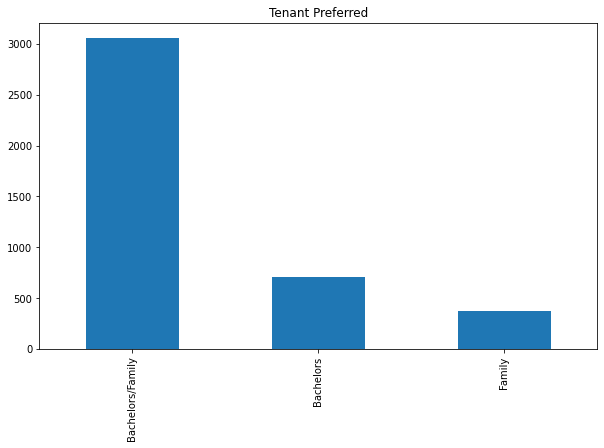

In [16]:
feature = categorical_features[1]
count = data_frame[feature].value_counts()
percent = 100*data_frame[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(10,6));

                 jumlah sampel  persentase
Contact Owner             3115        75.4
Contact Agent             1015        24.6
Contact Builder              1         0.0


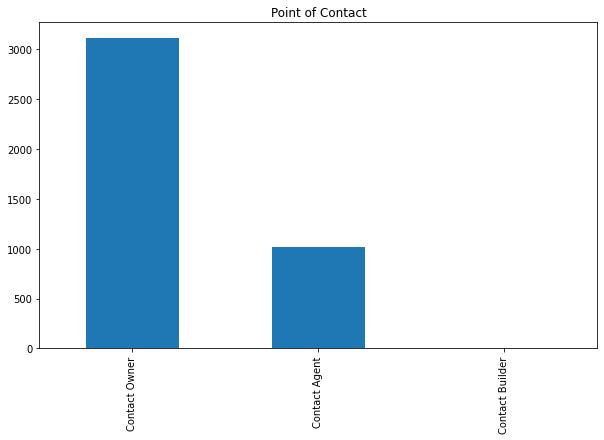

In [17]:
feature = categorical_features[2]
count = data_frame[feature].value_counts()
percent = 100*data_frame[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(10,6));

             jumlah sampel  persentase
Super Area            2330        56.4
Carpet Area           1799        43.5
Built Area               2         0.0


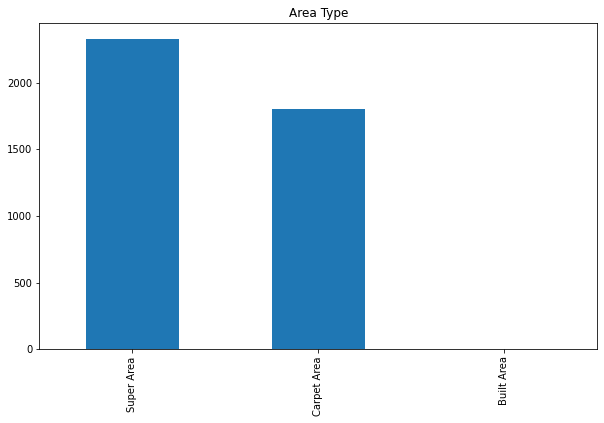

In [18]:
feature = categorical_features[3]
count = data_frame[feature].value_counts()
percent = 100*data_frame[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, figsize=(10,6));

Melihat histogram numerical features

---



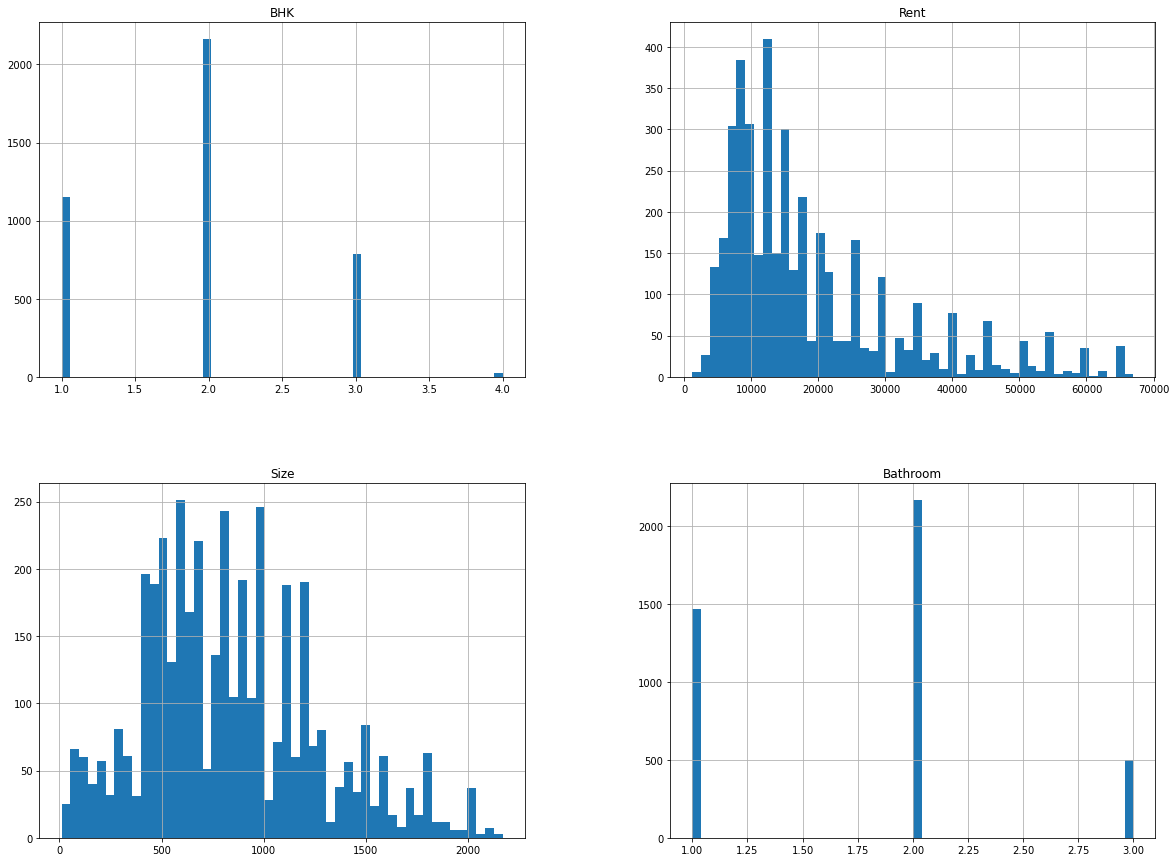

In [19]:
data_frame.hist(bins=50, figsize=(20,15))
plt.show()

Multivariate analysis <br>
Harga rata-rata rumah dibandikan dengan tipe area, kota, status furnish rumah, dsb

---

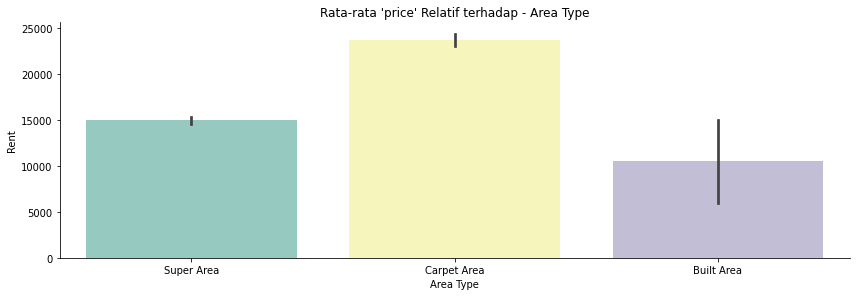

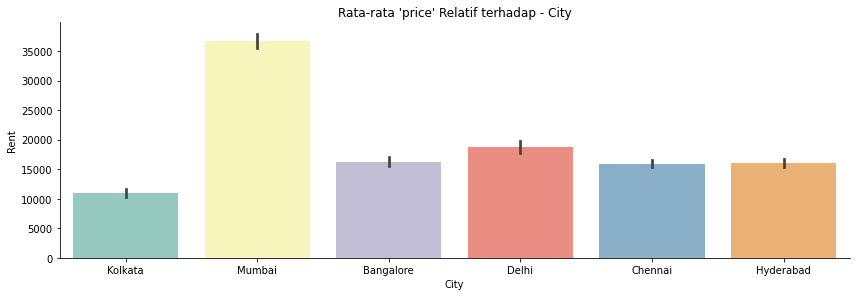

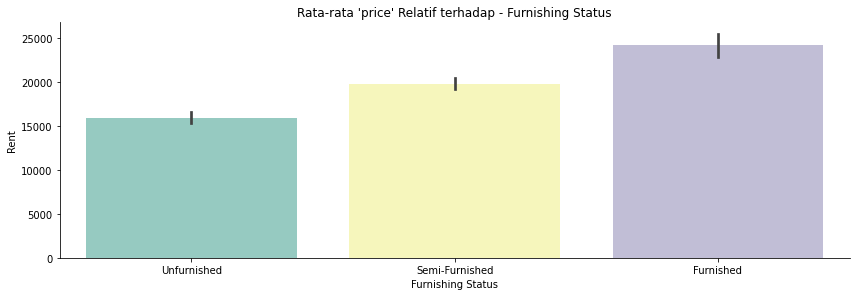

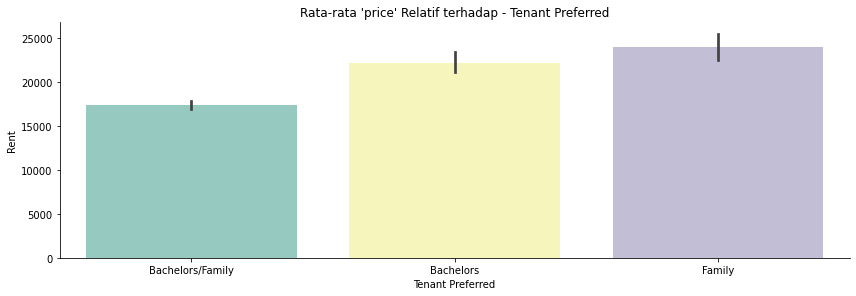

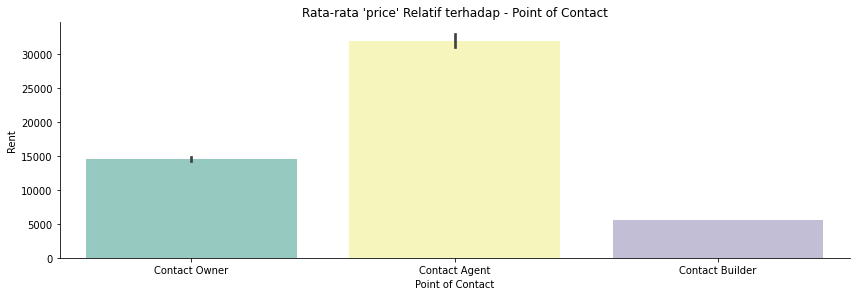

In [20]:
# house_features = data_frame.select_dtypes(include='object').columns.to_list()
house_features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


for col in house_features:
  sns.catplot(x=col, y="Rent", kind="bar", dodge=False, height = 4, aspect = 3,  data=data_frame, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Mengukur skor korelasi antara fitur-fitur yang ada

---



Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

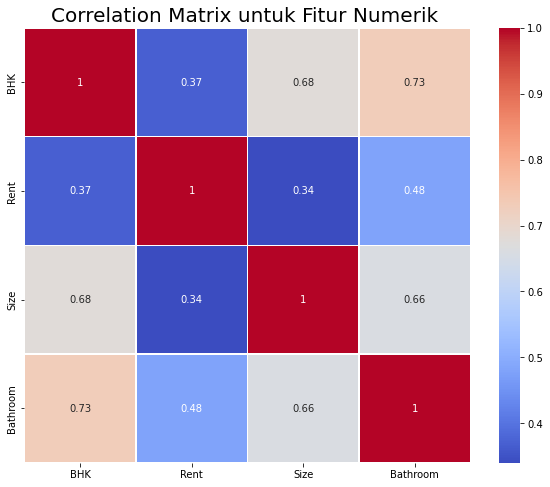

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_frame.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Melakukan one-hot-encoding pada data categorical

---



In [22]:
from sklearn.preprocessing import OneHotEncoder
data_frame = pd.concat([data_frame, pd.get_dummies(data_frame['Furnishing Status'], prefix='Furnishing Status')],axis=1)
data_frame = pd.concat([data_frame, pd.get_dummies(data_frame['Tenant Preferred'], prefix='Tenant Preferred')],axis=1)
data_frame = pd.concat([data_frame, pd.get_dummies(data_frame['Point of Contact'], prefix='Point of Contact')],axis=1)
data_frame = pd.concat([data_frame, pd.get_dummies(data_frame['Area Type'], prefix='Area Type')],axis=1)
data_frame = pd.concat([data_frame, pd.get_dummies(data_frame['Floor'], prefix='Floor')],axis=1)
data_frame = pd.concat([data_frame, pd.get_dummies(data_frame['City'], prefix='City')],axis=1)
data_frame = pd.concat([data_frame, pd.get_dummies(data_frame['Area Locality'], prefix='Area Locality')],axis=1)
data_frame.drop(['Furnishing Status','Tenant Preferred','Point of Contact', 'Area Type','Floor','City','Area Locality'], axis=1, inplace=True)
data_frame.head()

,BHK,Rent,Size,Bathroom,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,...,"Area Locality_spring grove uno, Lokhandwala Twp",Area Locality_sra,Area Locality_sspdl Mayfair,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield
0,2,10000,1100,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,20000,800,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,17000,1000,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,10000,800,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,7500,850,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Membagi dataset menjadi beberapa bagian (test, train)

---



In [23]:
from sklearn.model_selection import train_test_split
 
X = data_frame.drop(["Rent"],axis =1)
y = data_frame["Rent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Melakukan standarisasi pada data yang ada menggunakan library StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['Size', 'Bathroom', 'BHK']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Size,Bathroom,BHK
3497,2.214832,1.895994,1.533581
4369,2.015573,1.895994,1.533581
3867,-0.211436,0.358936,0.103854
3417,-0.094225,0.358936,0.103854
4745,0.374619,0.358936,0.103854


Menunjukkan keadaan data secara deskriptif

---



In [25]:
X_train[numerical_features].describe().round(4)

,Size,Bathroom,BHK
count,3717.0000,3717.0000,3717.0000
mean,0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001
min,-1.9462,-1.1781,-1.3259
25%,-0.7975,-1.1781,-1.3259
50%,-0.0942,0.3589,0.1039
75%,0.6090,0.3589,0.1039
max,3.1174,1.8960,2.9633


Data frame untuk model yang akan digunakan. Disini saya menggunakan KNN dan Random Forest

---



In [26]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest'])

Melatih data dengan algoritma KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Melatih data dengan algoritma Random Forest

In [28]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Melakukan scaling sehingga memiliki rata-rata=0 dan varians=1

In [29]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [30]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,42271.432711,65341.632861
RF,13053.411111,50124.805881


Hasil evaluasi pada masing-masing model

---

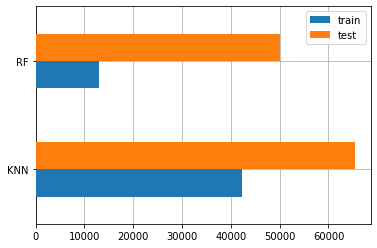

In [31]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Hasil prediksi dari model tersebut untuk 1 harga rumah

In [32]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF
3255,15000,12750.0,13778.4


Score akurasi untuk random forest

In [33]:
print("Random Forest Training Accuracy:", RF.score(X_train, y_train))
print("Random Forest Validation Accuracy", RF.score(X_test, y_test))

Random Forest Training Accuracy: 0.9270479820067166
Random Forest Validation Accuracy 0.7283359554046394


Score akurasi untuk k-nearest neighbors

In [34]:
print("K-Nearest Neighbors Training Accuracy:", knn.score(X_train, y_train))
print("K-Nearest Neighbors Validation Accuracy:", knn.score(X_test, y_test))

K-Nearest Neighbors Training Accuracy: 0.7637562861122146
K-Nearest Neighbors Validation Accuracy: 0.6458645185401604
